# Examen 2: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia

El examen consta de dos partes, cada una con igual valor. Es un examen individual y no se permite el uso de herramientas de inteligencia artificial para su realización. Una lectura detallada será suficiente para resolver ambos problemas, basándose en los conocimientos adquiridos en el curso.


Presentado por Joan Mauricio Yanza Ruiz

### I. Radiación de Cuerpo Negro:

 La radiación de cuerpo negro, se refiere a la radiación electromagnética emitida por un objeto que absorbe toda la radiación incidente sin reflejar nada. La cual  puede ser modelada según la ley de Planck que relaciona la intensidad de la radiación de un cuerpo negro con la temperatura del objeto. A medida que la temperatura aumenta, la longitud de onda máxima de la radiación se desplaza hacia longitudes de onda más cortas. Para generar una intuición,  piensa en  trozo  de carbón, el cual representa un ejemplo cercano a lo que se conoce como un cuerpo negro en física. Este elemento tiene la particularidad de reflejar mínimamente la luz, capturando prácticamente toda la radiación que recibe. Al alcanzar temperaturas elevadas, similar a las de las brasas ardientes, el carbón comienza a emitir radiación tanto en el rango visible como en el infrarrojo del espectro.

  La radiación de cuerpo negro puede ser modelada empleando la ley de Planck para describir la densidad  espectral  de energía de la radiación emitida por un cuerpo negro a una temperatura (T). La ley de Planck establece que la densidad espectral de energía $u(\lambda, T)$  para un cuerpo negro está dada por:

\begin{equation}
u(\lambda, T) = \frac{{8\pi hc}}{{\lambda^5}} \cdot \frac{1}{{e^{\frac{{hc}}{{\lambda k_B T}}} - 1}}
\end{equation}

 donde:

$h = 6.62607015  \times 10^{-34} \mathrm{J} s$ : es la constante de Planck.

$c = 299792458 \mathrm{m/s}$ : es la velocidad de la luz.


$k_B = 1.380649 \times 10^{-23}\mathrm{J/K}$ : es la constante de Boltzmann.

$ \lambda$ es la longitud de onda.


Podemos integrar la densidad espectral de energía sobre todas las longitudes de onda para obtener la potencia total emitida por unidad de área de un cuerpo negro a una temperatura (T) (ley  de Stefan-Boltzmann):


\begin{equation}
P_{\text{total}} = \sigma T^4
\end{equation}

donde:

$\sigma$ es la constante de Stefan-Boltzmann.


Su tarea en este examen será:

1. Realizar una gráfica de $u(\lambda, T)$ vs $\lambda$, toma valores de $\lambda$ entre $1\mathrm{nm}$ y $8\mathrm{\mu m}$, para valores de
```T=np.array([1000,2000,4000,5000]) ```K


Las curvas resultantes deben reflejar el comportamiento típico de datos experimentales, tal como se muestra al ejecutar el siguiente código :

```python
import requests
from io import StringIO


# URL del archivo txt en línea
url_del_archivo = 'http://www.sc.ehu.es/sbweb/fisica3/calor/radiacion/espectro.txt'

# Realizar una petición GET para obtener el contenido del archivo
respuesta = requests.get(url_del_archivo)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    # Acceder al contenido del archivo
    data_string = respuesta.text
else:
    print(f"Error al acceder al archivo: {respuesta.status_code}")
# Utilizar StringIO para simular un archivo en memoria a partir del string
data = StringIO(data_string)
# Convertir el string a DataFrame, especificando el separador de espacios
df = pd.read_csv(data, sep=" ", header=None)
# Asignar nombres a las columnas si es necesario
df.columns = ['A', 'B', 'C', "D"]
# Mostrar el DataFrame
plt.plot(df.A, df.B)
```



2. Determina la longitud de onda para el cual se obtiene el  máximo valor de cada unas de las anteriores curvas, comprueba que $\lambda_{max} T=2897.8 \mathrm{\mu mK}$



3. De la ley de densidad espectral de energía, mostrar que la potencia total emitida por unidad de área $P_{total}$ es:



\begin{equation}
P_{\text{total}} =  \frac{c}{4}\int_0^{\infty} u(\lambda, T) \mathrm{d}\lambda = \sigma T^4
\end{equation}

donde $\sigma=5.67\times 10^{-8}\mathrm{W m^{-2} K^{-4}}$. Para resolver la integral, se recomienda emplear la sustitución $x=\frac{hc}{\lambda k_BT}$ y emplear algún método computacional de integración conocido :

\begin{equation}
P_{\text{total}} \propto \int_0^{\infty} \frac{x^3}{e^{x}-1} \mathrm{d}x
\end{equation}

muestre que el valor de la integral se aproxima al valor esperado $\frac{\pi^4}{15}$.

Con el resultado anterior, construya una curva de $P_{total}$ vs $T^4$, ¿su resultado esta acorde con los esperado?



SOLUCION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sp
import warnings
warnings.filterwarnings("ignore", message="overflow encountered in exp")
from scipy.interpolate import interp1d

from scipy import integrate

1)Realizar una gráfica de  u(λ,T)  vs  λ , toma valores de  λ  entre  1nm  y  8μm , para valores de T=np.array([1000,2000,4000,5000])K

In [3]:
h = 6.62607015e-34
c = 299792458
kb = 1.380649e-23
T = np.array([1000,2000,4000,5000])
lam = np.linspace(1e-9,8e-6,100)

In [4]:
def densidad(lam,T):

  factor1 = (8* np.pi * h *c) / (lam**5)
  exponencial = np.exp(h*c / (lam * kb *T))
  factor2 = 1 / (exponencial - 1)
  return factor1 * factor2


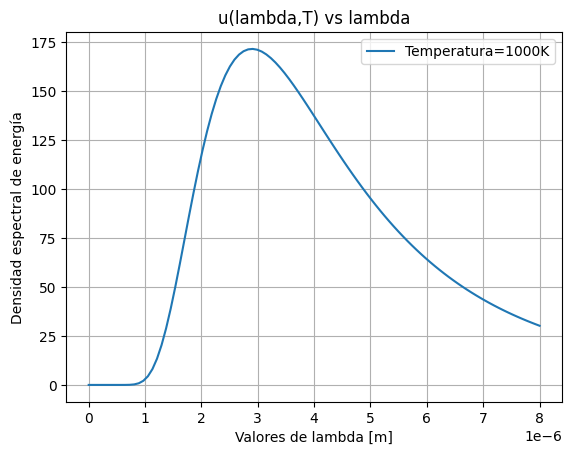

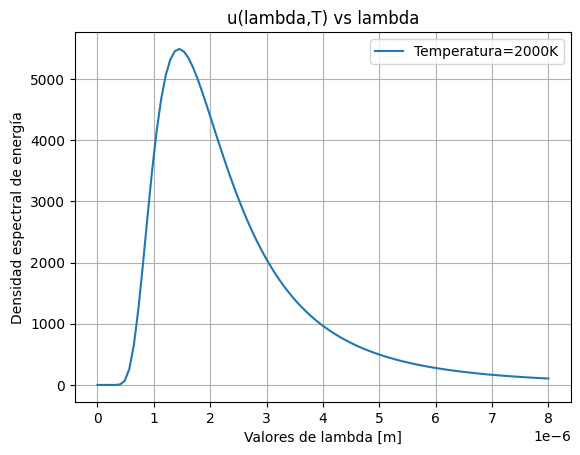

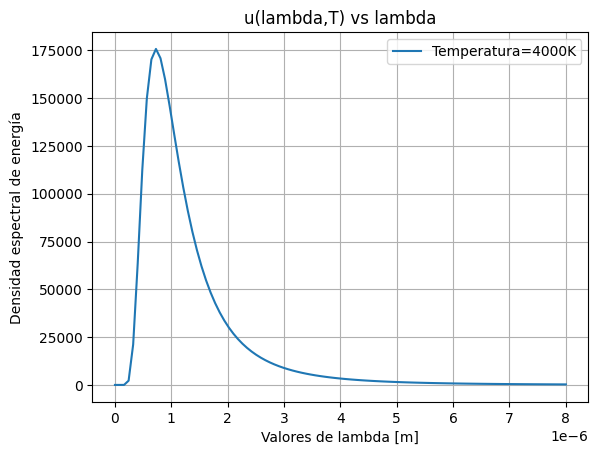

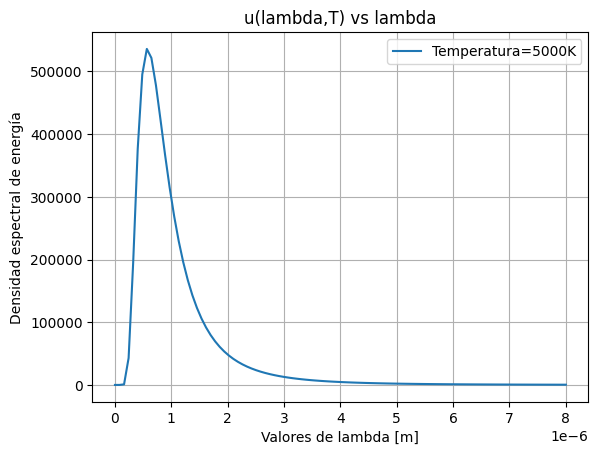

In [5]:
for i in range(len(T)):
  plt.plot(lam,densidad(lam,T[i]), label=f"Temperatura={T[i]}K")
  plt.xlabel("Valores de lambda [m]")
  plt.ylabel("Densidad espectral de energía")
  plt.title("u(lambda,T) vs lambda")
  plt.legend()
  plt.grid()
  plt.show();

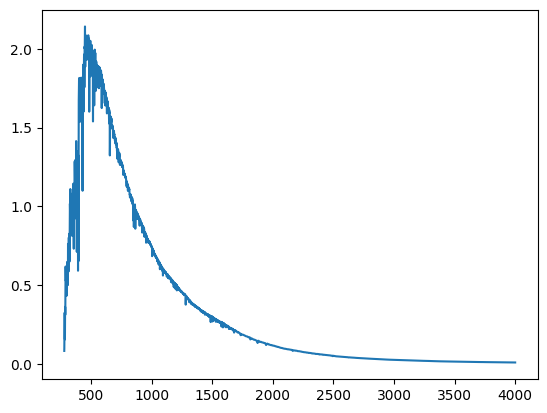

In [6]:
import requests
from io import StringIO


# URL del archivo txt en línea
url_del_archivo = 'http://www.sc.ehu.es/sbweb/fisica3/calor/radiacion/espectro.txt'

# Realizar una petición GET para obtener el contenido del archivo
respuesta = requests.get(url_del_archivo)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    # Acceder al contenido del archivo
    data_string = respuesta.text
else:
    print(f"Error al acceder al archivo: {respuesta.status_code}")
# Utilizar StringIO para simular un archivo en memoria a partir del string
data = StringIO(data_string)
# Convertir el string a DataFrame, especificando el separador de espacios
df = pd.read_csv(data, sep=" ", header=None)
# Asignar nombres a las columnas si es necesario
df.columns = ['A', 'B', 'C', "D"]
# Mostrar el DataFrame
plt.plot(df.A, df.B)

Determina la longitud de onda para el cual se obtiene el máximo valor de cada unas de las anteriores curvas, comprueba que  λmaxT=2897.8μmK

In [7]:
indices= np.zeros_like(T)
for i in range(len(T)):
  # sin [0][0], el arreglo indices seria otro conjunto de arreglos, solo necesito elementos
 indices[i]= np.where(densidad(lam,T[i])==np.max(densidad(lam,T[i])))[0][0]

for i in indices:
  lam_max = lam[indices]

constante =lam_max * T *1e6 # se convierte de metros a micrometros


In [8]:
""" Se expone en una tabla las longitudes de onda para el cual se obtiene un valor maximo de cada una de las anteriores curvas"""

df = pd.DataFrame()
df["Curvas: Temperatura[K]"] = T
df["Longitud de onda[nm] con densidad máxima"] = lam_max * 1e9
df["Constante umK"] = constante
print("El promedio del producto lambda_max * T es ",round(np.mean(constante),1),",muy cercano a 2897.8 umk \n")
df

El promedio del producto lambda_max * T es  2891.5 ,muy cercano a 2897.8 umk 



,Curvas: Temperatura[K],Longitud de onda[nm] con densidad máxima,Constante umK
0,1000,2909.727273,2909.727273
1,2000,1455.363636,2910.727273
2,4000,728.181818,2912.727273
3,5000,566.585859,2832.929293




3. De la ley de densidad espectral de energía, mostrar que la potencia total emitida por unidad de área $P_{total}$ es:



\begin{equation}
P_{\text{total}} =  \frac{c}{4}\int_0^{\infty} u(\lambda, T) \mathrm{d}\lambda = \sigma T^4
\end{equation}

donde $\sigma=5.67\times 10^{-8}\mathrm{W m^{-2} K^{-4}}$. Para resolver la integral, se recomienda emplear la sustitución $x=\frac{hc}{\lambda k_BT}$ y emplear algún método computacional de integración conocido :

\begin{equation}
P_{\text{total}} \propto \int_0^{\infty} \frac{x^3}{e^{x}-1} \mathrm{d}x
\end{equation}

muestre que el valor de la integral se aproxima al valor esperado $\frac{\pi^4}{15}$.

Con el resultado anterior, construya una curva de $P_{total}$ vs $T^4$, ¿su resultado esta acorde con los esperado?



***SOLUCION***

Sea la potencia igual a :
\begin{equation}
P_{\text{total}} =  \frac{c}{4}\int_0^{\infty} u(\lambda, T) \mathrm{d}\lambda = \sigma T^4
\end{equation}

Por tanto:
\begin{equation}
P_{\text{total}} =  \frac{c}{4}\int_0^{\infty}\frac{{8\pi hc}}{{\lambda^5}} \cdot \frac{1}{{e^{\frac{{hc}}{{\lambda k_B T}}} - 1}}\mathrm{d}\lambda
\end{equation}

Se establece $$C1 = 8 \pi hc \times \frac{c}{4} = 2 \pi h c^2$$.

Voy a asignar:$$ C2= \frac{hc}{k_BT} $$.

C1 y C2 son dos coeficientes que  se originan de la derivación de la Ley de Wien a partir de la distribución de Planck. Se conocen como coeficientes de radiacion. Por otro lado:

\begin{equation}
P_{\text{total}} \propto \int_0^{\infty} \frac{x^3}{e^{x}-1} \mathrm{d}x
\end{equation}

Con esta integral se obtiene el valor de $$π^4/15$$.

Se obtiene el valor de la potencia asi:
$$P = \frac{π^4}{15} \times \frac{C1}{C2^4}$$

$$P = \frac{π^4}{15} \times \frac{ 2 \pi h c^2}{( \frac{hc}{k_BT} )^4}$$

$$P = \frac{π^4}{15} \times \frac{ 2 \pi h c^2}{( \frac{hc}{k_BT} )^4}$$


$$P = \frac{π^4}{15} \times \frac{ 2 \pi  k_B^4}{h^3c^2} \times T^4 = \sigma\times T^4$$

Se evalua primero esta integral:

\begin{equation}
P_{\text{total}} \propto \int_0^{\infty} \frac{x^3}{e^{x}-1} \mathrm{d}x
\end{equation}


In [9]:
""" Aqui se muestra que el valor de la integral que se aproxima al valor esperado"""
def funcion(x):
  denominador = np.exp(x) -1
  numerador = x ** 3
  return numerador/denominador

valor_integral, error = integrate.quad(funcion, 0, np.inf)
valor_esperado = ((np.pi)**4)/15
print("El valor de la integral anterior es ",valor_integral)
print(" el valor esperado es",valor_esperado)
print("El error es de ", abs(valor_integral-valor_esperado)/valor_esperado)


El valor de la integral anterior es  6.49393940226683
 el valor esperado es 6.493939402266828
El error es de  2.735407168690519e-16


In [10]:
""" Se usa la penultima expresion de arriba para hallar la potencia"""
def potencia(Te):
  num = 2 * (np.pi) * (kb**4)
  den = (h**3)* (c**2)
  p = num /den

  stefan = p * valor_integral
  potencia = stefan * (Te**4)
  return potencia

In [11]:
potencias = potencia(T) # potencias para cada valor de temperatura
""" ahora se compara con los valores esperados teoricos """
sigma = 5.67e-8
potencias_teoricas = sigma * (T**4)

pot = pd.DataFrame()
pot["Potencias calculadas"] = potencias
pot["Potencias teoricas"] = potencias_teoricas
pot["Error relativo %"] = (abs(potencias-potencias_teoricas)/potencias_teoricas)*100
pot

,Potencias calculadas,Potencias teoricas,Error relativo %
0,5.670374e+04,56700.0,0.006604
1,9.072599e+05,907200.0,0.006604
2,1.451616e+07,14515200.0,0.006604
3,3.543984e+07,35437500.0,0.006604


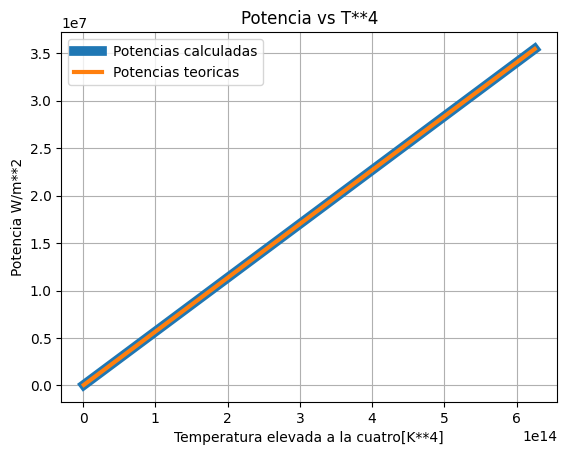

In [12]:
plt.plot(T**4,potencias,linewidth=7, label="Potencias calculadas")
plt.plot(T**4,potencias_teoricas,linewidth=3, label="Potencias teoricas")
plt.xlabel("Temperatura elevada a la cuatro[K**4]")
plt.ylabel("Potencia W/m**2")
plt.title("Potencia vs T**4")
plt.legend()
plt.grid()
plt.show();

Los resultados son acordes a lo esperado: las curvas de las potencias calculadas y teoricas coindicen, además son lineas rectas, lo cual es concordante con la relacion entre la  potencia  y la  cuarta potencia de la temperatura que es de tipo lineal.

# 2. Calentamiento Global
El conjunto de datos a continuación ofrece una visión detallada de las anomalías de temperatura terrestre:


https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt


Las anomalías de temperatura son variaciones en la temperatura media superficial del planeta respecto a un promedio histórico. Estas variaciones pueden ser tanto positivas (más cálidas) como negativas (más frías) y constituyen indicadores esenciales del cambio climático a nivel mundial. Para obtener información adicional, consulte:


https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/?intent=111

Este ejercicio no solo busca profundizar en la comprensión del calentamiento global, sino también distinguir entre la interpolación y la construcción de modelos. Con el código proporcionado que procesa los datos de cambio climático reportados por la National Aeronautics and Space Administration,


```python
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
```

Realice lo siguiente en un gráfico combinado:



1. Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.
2. Gráfico de los datos sin suavizar (NoSauvizado) frente al año.


3. Analice el gráfico resultante y extraiga conclusiones.

Posteriormente, construiremos un modelo para evaluar el incremento de la temperatura en años recientes utilizando el código de regresión dado a continuación:


```python
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

```


 Seleccione los datos del periodo 2000-2020 y proceda a:

4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.
5. Interpolar los datos entre los años 2000 y 2020.


6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.






**SOLUCION**

Realice lo siguiente en un gráfico combinado:

Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.
Gráfico de los datos sin suavizar (NoSauvizado) frente al año.
Analice el gráfico resultante y extraiga conclusiones

In [13]:
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())

    Año  NoSauvizado  Promedio_5
0  1880        -0.17       -0.09
1  1881        -0.09       -0.13
2  1882        -0.11       -0.17
3  1883        -0.17       -0.21
4  1884        -0.29       -0.24


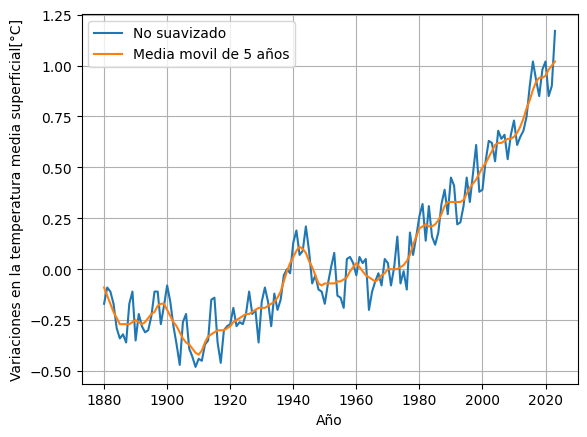

In [14]:
plt.plot(data.Año, data.NoSauvizado, label="No suavizado")
plt.plot(data.Año, data.Promedio_5, label="Media movil de 5 años")
plt.grid()
plt.legend()
plt.xlabel("Año")
plt.ylabel("Variaciones en la temperatura media superficial[°C]")
plt.show();


La grafica muestran variaciones de las temperaturas en los ultimos 140 años. El cero significa que la temperatura en un año en particular coincidió con el promedio historico y existen fluctuaciones con respecto a ese promedio. POr ejemplo, las temperaturas del final de siglo XIX y comienzos del siglo XX estuvieron por debajo del promedio historico, una epoca un poco más fria de lo usual, pero ya en los años 40 las temperaturas se mantuvieron cercanas al promedio historico hasta la decada de los 70. Pero ya a finales de los 70, comienza un ascenso en las temperaturas importante hasta ahora. Desde finales de 1880 hasta ahora, casi 140 años, la temperatura se ha elevado aproximadamente unos 1.3°c. El mayor incremento de temperatura se ha dado en los ultimos 50 años con una elevacion de 1°c.

Posteriormente, construiremos un modelo para evaluar el incremento de la temperatura en años recientes utilizando el código de regresión dado a continuación:

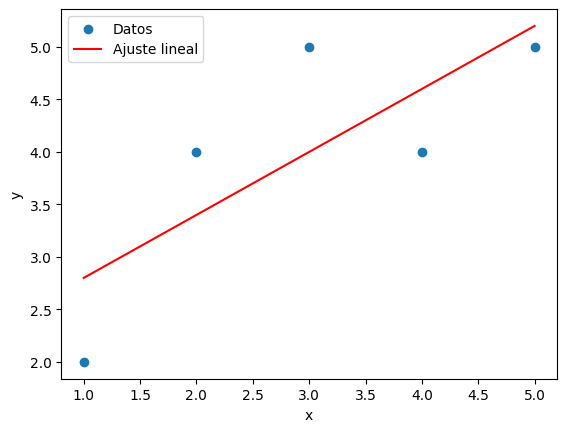

In [15]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Seleccione los datos del periodo 2000-2020 y proceda a:

Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.
Interpolar los datos entre los años 2000 y 2020.
¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.

In [16]:
años_2000 = data[data.Año >= 2000]
años_2000 = años_2000[años_2000.Año <= 2020]
años_2000.head()

,Año,NoSauvizado,Promedio_5
120,2000,0.39,0.50
121,2001,0.53,0.52
122,2002,0.63,0.55
123,2003,0.62,0.58
124,2004,0.53,0.61


In [17]:
""" Ajuste lineal"""
params2, covariance2 = curve_fit(linear_func,años_2000.Año,años_2000.NoSauvizado)

# Parámetros del ajuste
m, b = params2

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(años_2000.Año,), max(años_2000.Año), 100)
y_fit = linear_func(x_fit, m, b)


In [18]:
""" Interpolacion lineal"""

x_ = np.array(años_2000.Año)
y_ = np.array(años_2000.NoSauvizado)
int_lin = interp1d(años_2000.Año,años_2000.NoSauvizado)

xx = np.linspace(2000,2020,100)


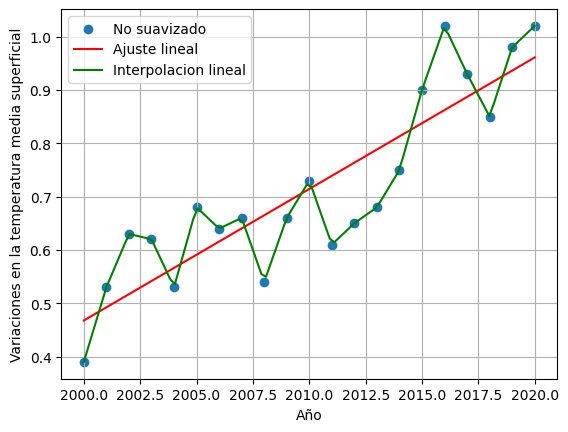

In [19]:
plt.scatter(años_2000.Año,años_2000.NoSauvizado, label="No suavizado")
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.plot(xx,int_lin(xx),label='Interpolacion lineal', color='green')
plt.grid()
plt.legend()
plt.xlabel("Año")
plt.ylabel("Variaciones en la temperatura media superficial")
plt.show();


Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta

Es preferible la interpolacion en este caso porque su curva pasa por todos los puntos de los datos no suavizados, en consecuencia describe mejor  las variaciones de temperaturas.

¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.

In [20]:
y_fit = linear_func(2030, m, b)
print("el incremento de temperatura anomala para el año 2030 es",y_fit,"°c")

el incremento de temperatura anomala para el año 2030 es 1.2075324631057498 °c


La interpolacion nos permite obtener un valor para el intervalo [2000,2020] pero no se puede emplear para hacer una prediccion de incremento de temperatura en  un año por fuera de ese rango. Por tal motivo, se puede usar el ajuste lineal de parametros de modelo, que cuenta con una pendiente y un intercepto, por lo que se puede obtener la variacion de temperatura para el año 2030, tomando este valor como argumento de la funcion linear_func. En la anterior celda se muestra lo dicho, se predice una variacion de 1.21 grados aproximadamente.

In [23]:
2*(h**4)*(c**5) / kb**5 *(1000**5)

1.8609778954377517e+39